# Fraud and Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

For the task of fraud and anomaly detection, we are provided with 3 different data sets.

 **report_frauds.csv**: contains fraud IDs  
 **transaction_amounts.csv**: contains transaction IDs and amounts  
 **transaction_features.csv**: contains pre-engineered features that relate to these transactions

In [2]:
#read the data sets
reported_frauds= pd.read_csv('reported_frauds.csv', delimiter='|')
transaction_amounts= pd.read_csv('transaction_amounts.csv', delimiter='|')
transaction_features= pd.read_csv('transaction_features.csv', delimiter='|')

In [3]:
transaction_features

,transaction_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,...,-0.134401,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922
1,1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,...,-0.747221,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613
2,2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,...,-0.254901,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781
3,3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,...,0.062672,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857
4,4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,...,-0.743983,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285294,285294,-1.191026,-0.823760,1.692521,1.650847,-1.059258,0.747674,0.841543,0.216903,0.005823,...,0.172030,0.907725,0.535632,0.966653,0.854687,0.051869,-0.422855,-0.187363,0.108582,0.217219
285295,285295,-1.985543,1.092587,0.724983,-0.464448,-0.221308,0.141794,-0.225605,0.469634,0.462939,...,0.723124,0.066081,0.000948,0.098065,-0.109484,-0.276082,-0.669929,1.034755,-0.382103,-0.044660
285296,285296,-2.287055,-0.640815,1.560757,1.664977,-2.171254,2.187241,0.568275,-2.864007,-0.487111,...,0.346546,0.729307,-1.227555,0.607186,-1.821635,0.367361,-0.495471,-0.281715,0.465981,-0.258252
285297,285297,1.453140,-0.740726,-1.518675,-1.689475,1.670656,3.168565,-0.831807,0.697746,-0.897362,...,1.182162,0.201249,0.106206,0.180762,-0.212995,1.057209,0.944347,-0.051498,-0.009403,-0.000288


In [4]:
transaction_features.rename(columns={'transaction_id' : 'tra_id'}, inplace=True)

In [5]:
#check data sets out
reported_frauds.columns=['tra_id']
reported_frauds

,tra_id
0,1518
1,1545
2,1810
3,1956
4,2280
...,...
486,281052
487,281396
488,281510
489,281540


In [6]:
transaction_amounts

,tra_id,amount_eur
0,167782,2.69
1,61702,44.65
2,244391,12.95
3,151120,44.67
4,85249,0.00
...,...,...
285294,48072,3.92
285295,197047,49.09
285296,35407,15.99
285297,124230,18.26


In [7]:
transaction_features = pd.merge(transaction_features, transaction_amounts, on='tra_id')

In [8]:
transaction_features

,tra_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur
0,0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,...,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02
1,1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,...,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90
2,2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,...,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68
3,3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,...,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89
4,4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,...,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285294,285294,-1.191026,-0.823760,1.692521,1.650847,-1.059258,0.747674,0.841543,0.216903,0.005823,...,0.907725,0.535632,0.966653,0.854687,0.051869,-0.422855,-0.187363,0.108582,0.217219,378.00
285295,285295,-1.985543,1.092587,0.724983,-0.464448,-0.221308,0.141794,-0.225605,0.469634,0.462939,...,0.066081,0.000948,0.098065,-0.109484,-0.276082,-0.669929,1.034755,-0.382103,-0.044660,0.69
285296,285296,-2.287055,-0.640815,1.560757,1.664977,-2.171254,2.187241,0.568275,-2.864007,-0.487111,...,0.729307,-1.227555,0.607186,-1.821635,0.367361,-0.495471,-0.281715,0.465981,-0.258252,850.00
285297,285297,1.453140,-0.740726,-1.518675,-1.689475,1.670656,3.168565,-0.831807,0.697746,-0.897362,...,0.201249,0.106206,0.180762,-0.212995,1.057209,0.944347,-0.051498,-0.009403,-0.000288,25.00


# Data wrangling

In [9]:
#create a column for fraud positive (1) and fraud negative labels (0)
a = transaction_amounts['tra_id']
b = reported_frauds['tra_id']

In [10]:
a = transaction_amounts['tra_id']
b = pd.DataFrame(a[reported_frauds['tra_id']])
ind = b.index
ind_features = transaction_features.index

In [11]:
#indexes of:
reported_frauds

,tra_id
0,1518
1,1545
2,1810
3,1956
4,2280
...,...
486,281052
487,281396
488,281510
489,281540


In [12]:
transaction_features.head()

,tra_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur
0,0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,...,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02
1,1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,...,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90
2,2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,...,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68
3,3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,...,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89
4,4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,...,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09


In [13]:
ind = np.array(a[reported_frauds['tra_id']])
fraud_set = pd.DataFrame(transaction_features.loc[ind])

fraud_set['labels'] = '1'
fraud_set

,tra_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels
119169,119169,-1.378737,1.105969,1.763048,2.573931,-0.938866,1.621874,-1.231927,1.505325,-0.191949,...,0.319584,0.899559,-0.121194,-0.276495,-0.451194,0.233524,-0.292396,0.020742,7.07,1
102089,102089,-0.239699,1.238663,-0.270753,-0.476722,1.136407,-0.695454,1.095790,-0.176180,-0.024653,...,-0.012664,0.394911,-0.404147,-0.695764,-0.061592,0.618560,0.387273,0.258091,0.99,1
241833,241833,-2.822555,1.047440,0.648930,-4.215801,-0.040085,0.667084,-0.560526,-6.213248,2.605480,...,5.341254,-0.650591,0.279138,0.727077,0.500771,-1.000902,0.042294,-0.362404,95.53,1
148047,148047,-1.784910,-0.289975,1.085825,-0.199479,-0.013601,-1.119047,0.554719,0.279910,-0.495747,...,0.073218,-0.430244,0.262036,0.420308,-0.016702,0.287051,-0.117714,-0.094422,158.00,1
93019,93019,-0.765504,0.293219,1.229647,-0.445002,0.098718,-0.457085,1.911808,-0.421634,-0.427141,...,0.168359,0.479068,0.218174,0.453683,-0.021203,0.276467,-0.157484,-0.086211,191.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280369,280369,0.226895,0.708262,-0.175116,-0.703937,0.957916,-0.730225,0.945137,-0.203783,-0.103403,...,0.312056,0.956522,-0.226260,0.640262,0.081093,-0.206223,0.019919,0.000933,1.69,1
108864,108864,-0.556807,0.107543,0.792972,0.338579,-1.844728,1.021859,1.404927,-0.172524,-1.109448,...,0.058100,0.975360,0.104041,1.089692,-0.275048,-0.298058,0.528557,0.178986,362.50,1
277291,277291,-0.771057,-0.337998,0.802756,-2.218868,-1.061711,0.048463,2.204747,-0.904134,-0.778695,...,0.099391,0.722084,-0.223004,1.192480,0.120584,-0.366982,-0.343579,-0.345838,345.13,1
106820,106820,1.193663,-0.167191,0.215225,-0.197337,-0.106000,0.046720,-0.295264,-0.078563,1.399837,...,-0.260884,-0.646613,-0.115983,-0.828619,0.215352,0.911950,-0.111654,-0.005865,70.64,1


In [14]:
transaction_features['labels'] = ''

In [15]:
labels = fraud_set['labels']
transaction_features['labels'][ind] = labels

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
transaction_features['labels'].value_counts()

     284808
1       491
Name: labels, dtype: int64

In [17]:
transaction_features['labels'].replace('', '0', inplace=True)
transaction_features['labels'].value_counts()

0    284808
1       491
Name: labels, dtype: int64

In [18]:
transaction_amounts

,tra_id,amount_eur
0,167782,2.69
1,61702,44.65
2,244391,12.95
3,151120,44.67
4,85249,0.00
...,...,...
285294,48072,3.92
285295,197047,49.09
285296,35407,15.99
285297,124230,18.26


Now, the transaction features data set contains two types of transaction IDs. The first one is detected type 1 frauds that are labelled as '1'. The remaining data is labeled '0' which are the IDs that aren't related to any fraudulent activites. Among the fradulent activities, there are common ones that can be spotted quickly and manually interfered with as well as the ones that cannot be spotted on time and hence the money can be withdrawn by the third party individual so the bank customer needs to be repaid that amount in another transaction by the bank at a later time when the fraud is detected.

The two tasks requested are:

1. Training a model that can detect fraud according to the given labels. (detecting the common fraud cases)

2. Training a model that can detect anomalies in the data. (detecting the possible uncommon fraud cases that cost the bank money and affect reputation)

Therefore, the solutions will be:

1. Training a supervised machine learning model that can predict new frauds according to the given labels.

2. Training an unsupervised machine learning model that can find any anomalies in the current and future data.

At this level of the analysis, another important property of the data set is that the data points labeled as '0' overpopulate the data points labeled as '1' (284808 versus 491). This could introduce a strong bias during training of the models and needs to be taken care of.

In [19]:
# First, split features and transaction IDs.
transaction_ids = transaction_features['tra_id']
labels = transaction_features['labels']

In [20]:
# Features set with no modifications.

df = transaction_features.drop('tra_id', axis = 1, inplace=False)

In [21]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0


In [22]:
# Check for missing values in features data set.
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

feature_1
False    285299
Name: feature_1, dtype: int64

feature_2
False    285299
Name: feature_2, dtype: int64

feature_3
False    285299
Name: feature_3, dtype: int64

feature_4
False    285299
Name: feature_4, dtype: int64

feature_5
False    285299
Name: feature_5, dtype: int64

feature_6
False    285299
Name: feature_6, dtype: int64

feature_7
False    285299
Name: feature_7, dtype: int64

feature_8
False    285299
Name: feature_8, dtype: int64

feature_9
False    285299
Name: feature_9, dtype: int64

feature_10
False    285299
Name: feature_10, dtype: int64

feature_11
False    285299
Name: feature_11, dtype: int64

feature_12
False    285299
Name: feature_12, dtype: int64

feature_13
False    285299
Name: feature_13, dtype: int64

feature_14
False    285299
Name: feature_14, dtype: int64

feature_15
False    285299
Name: feature_15, dtype: int64

feature_16
False    285299
Name: feature_16, dtype: int64

feature_17
False    285299
Name: feature_17, dtype: int64

feature_18
Fals

# Exploratory data analysis


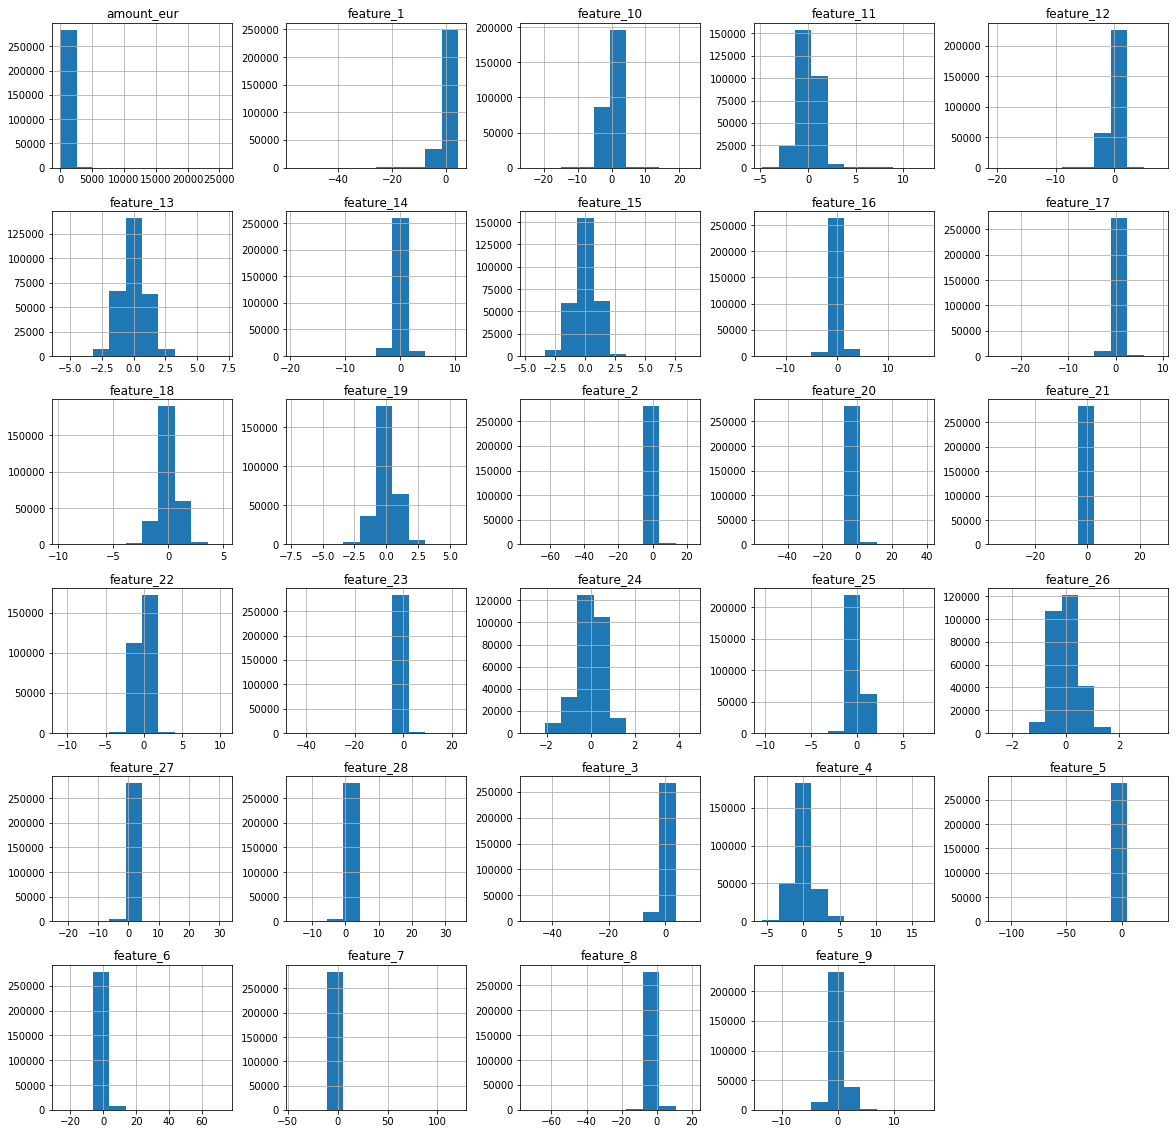

In [23]:
df.hist(figsize=(20,20))
plt.show()

In [24]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0


#  Importance of variables

Let's check for correlations in the data before.

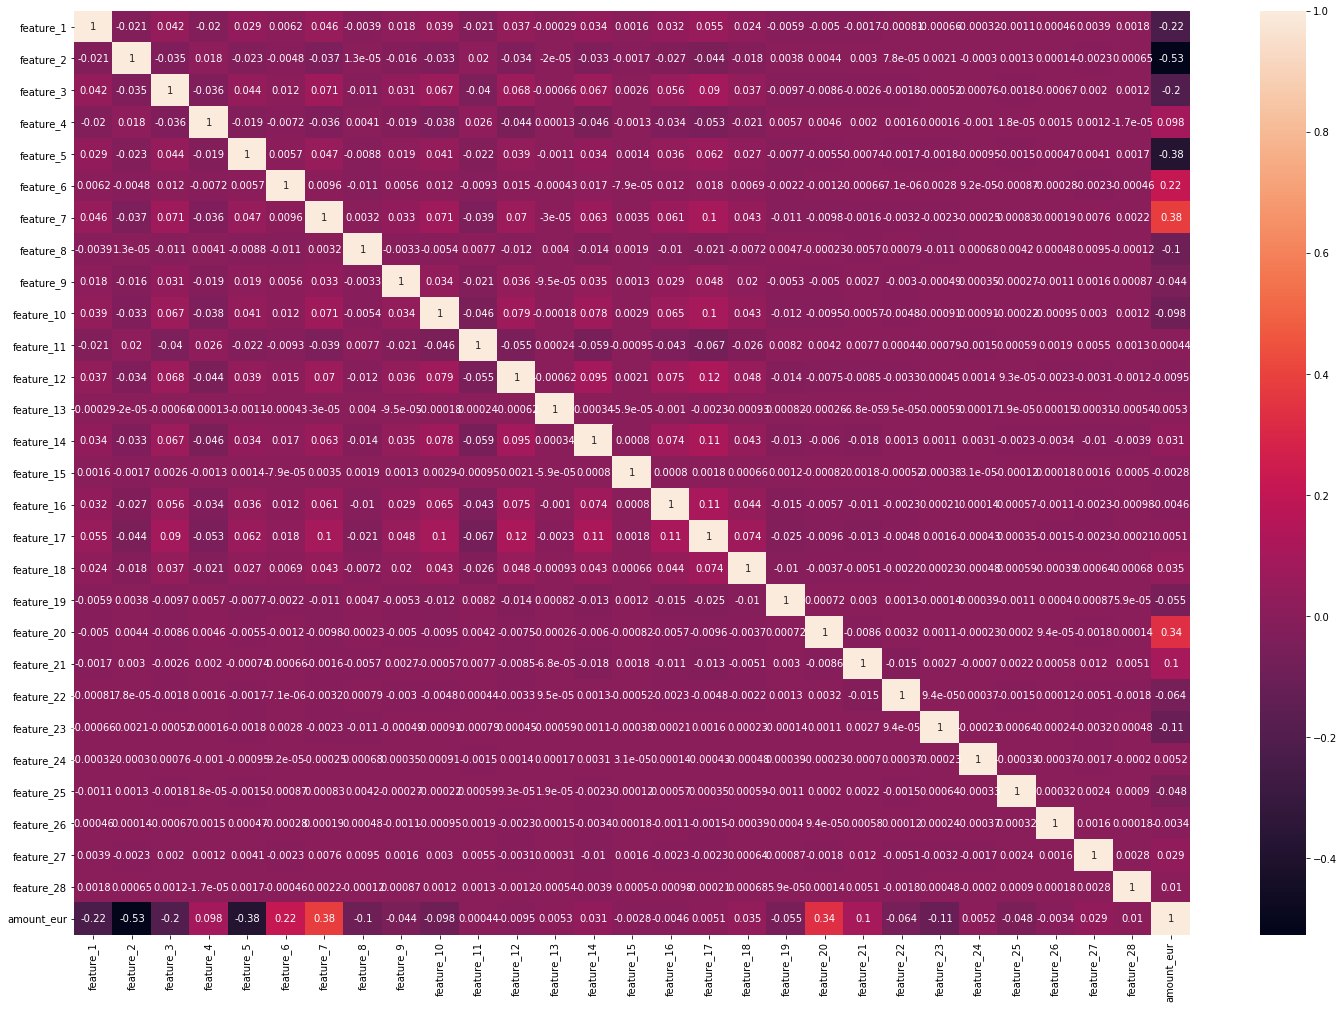

In [25]:
corr_matrix =df.corr()
#Here we can see how different features are correlated with one another.
plt.subplots(figsize=(25,17))

sns.heatmap(corr_matrix, annot=True)

plt.show()

In [26]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0


Now it is a good time to do a PCA analysis to check out what features contribute most to the overall variability in the data.

In [27]:
features = df.drop('labels', axis=1)

In [28]:
# A data set that only contains features.
features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09


In [29]:
#Fist scale the data.
from sklearn.preprocessing import StandardScaler
features_scaled = StandardScaler().fit_transform(features)

In [30]:
# Scaled data set looks like this.
features_scaled

array([[-5.96585652e-01, -1.12640276e+00,  1.42332586e+00, ...,
        -4.91951854e-01, -5.83944084e-01,  3.34097404e-01],
       [ 5.14676383e-01, -2.19845607e-01,  9.12634517e-01, ...,
         5.07270548e-02,  8.31059266e-02, -1.53958012e-01],
       [-3.72301739e-01,  3.26451991e-01,  1.18361165e+00, ...,
        -1.65753735e-01,  1.38060281e-01, -3.22691222e-01],
       ...,
       [-1.14667204e+00, -3.88163659e-01,  1.00076028e+00, ...,
         1.14286544e+00, -7.81546912e-01,  3.04366022e+00],
       [ 7.35343793e-01, -4.48092126e-01, -9.58555334e-01, ...,
        -2.37984830e-02, -1.28607391e-03, -2.53471440e-01],
       [-1.16794398e+00, -3.46453139e-01,  9.18135833e-01, ...,
        -2.64889342e+00,  1.16716938e+00,  3.42290277e-01]])

In [33]:
# Turn labels into another Pandas dataframe.
labels = pd.DataFrame(labels)
labels.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, labels], axis = 1)

In [35]:
#Let's check the PCA components.
print("Explained Variance: %s" % pca.explained_variance_ratio_)
print(pca.components_)

Explained Variance: [0.06640054 0.05745728]
[[-0.17275715 -0.39239667 -0.15278389  0.07786095 -0.28923347  0.16499594
   0.26310949 -0.07029986 -0.0354028  -0.07258442  0.00183226 -0.01011616
   0.00458902  0.01719637 -0.00205717 -0.00883603 -0.00371405  0.02162405
  -0.03935354  0.26003581  0.07721531 -0.04480133 -0.08622479  0.00322974
  -0.03512269 -0.00326082  0.02231343  0.00549218  0.71264584]
 [-0.17613125  0.16753865 -0.2847845   0.17954635 -0.18294018 -0.07569849
  -0.30580166  0.04815656 -0.15351339 -0.30553885  0.2148325  -0.33281518
   0.0040456  -0.33119256 -0.01130841 -0.29283828 -0.4163207  -0.20745084
   0.0643737   0.02992808  0.03383222  0.01365517  0.00135499 -0.00461727
   0.00279965  0.01022     0.00127447  0.00103742 -0.01563405]]


In [36]:
arr = np.array(pca.components_)

idx = (-arr).argsort(axis=-1)[:, :5] 
print('Top 5 features that explain the overall variability:', idx)

Top 5 features that explain the overall variability: [[28  6 19  5  3]
 [10  3  1 18  7]]


In [37]:
# One can also check for feature importance with decision trees.
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(features_scaled, labels)
print(model.feature_importances_)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.03335292 0.03068462 0.03540081 0.03488234 0.03448054 0.03655631
 0.03478275 0.03460304 0.03136425 0.03236545 0.03823808 0.03947972
 0.03900136 0.03436569 0.03633382 0.038276   0.03127097 0.03195641
 0.03255689 0.03174061 0.03315787 0.03312211 0.02984673 0.03872414
 0.03446518 0.03280604 0.03889916 0.03419808 0.03308812]


In [38]:
arr = np.array(model.feature_importances_)
idx = (-arr).argsort()[:5]

print('Five most important features according to trees are feature numbers:', idx)

Five most important features according to trees are feature numbers: [11 12 26 23 15]


In [39]:
#One can try recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 10)
fit = rfe.fit(features_scaled, labels)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anacon

Num Features: 10
Selected Features: [False  True  True False False False  True False  True False False  True
 False False False  True False False  True False  True  True False False
  True False False False False]
Feature Ranking: [17  1  1  5 12 10  1  8  1 18  9  1 14  6  3  1  4 19  1  7  1  1 13 20
  1  2 15 16 11]


In [40]:
#Finally, try out the logistic regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(features_scaled,labels)

yhat = LR.predict(features_scaled)
yhat_prob = LR.predict_proba(features_scaled)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Feature: 0, Score: -0.00424
Feature: 1, Score: 0.01811
Feature: 2, Score: -0.03029
Feature: 3, Score: -0.00907
Feature: 4, Score: -0.00631
Feature: 5, Score: 0.00966
Feature: 6, Score: 0.02338
Feature: 7, Score: -0.01582
Feature: 8, Score: -0.01732
Feature: 9, Score: -0.00020
Feature: 10, Score: 0.00837
Feature: 11, Score: -0.01564
Feature: 12, Score: 0.00822
Feature: 13, Score: 0.00804
Feature: 14, Score: 0.01309
Feature: 15, Score: 0.02711
Feature: 16, Score: -0.01205
Feature: 17, Score: -0.00273
Feature: 18, Score: -0.02446
Feature: 19, Score: 0.00794
Feature: 20, Score: 0.03163
Feature: 21, Score: -0.02759
Feature: 22, Score: -0.00186
Feature: 23, Score: -0.00083
Feature: 24, Score: 0.01754
Feature: 25, Score: -0.01481
Feature: 26, Score: -0.00192
Feature: 27, Score: 0.00321
Feature: 28, Score: -0.00008


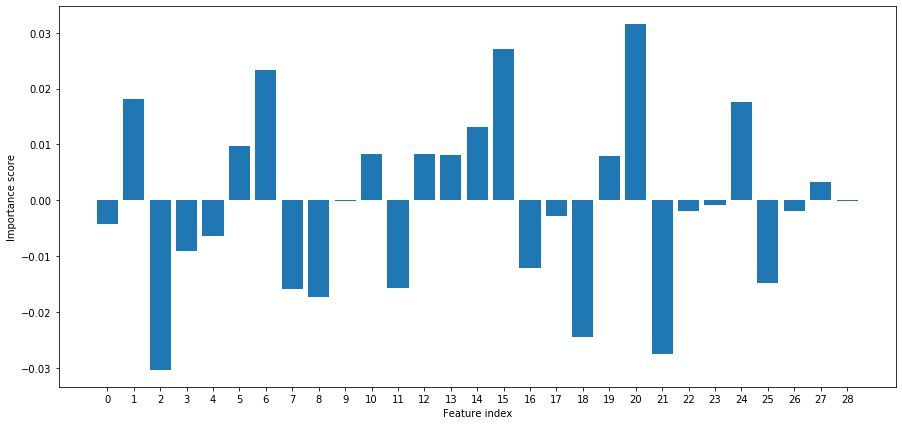

In [41]:
importance = LR.coef_[0]
fig = plt.figure(figsize=(15,7))

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([features_scaled for features_scaled in range(len(importance))], importance)
#plt.ylim(0,0.0005)
plt.xticks(range(len(importance)))
plt.xlabel('Feature index')
plt.ylabel('Importance score')
plt.show()

In [43]:
# A combination of feature importance tests will be used for feature selection. 

selected_features = features.drop(["feature_1", 'feature_5','feature_9','feature_10', 'feature_13', 'feature_14','feature_16','feature_17','feature_18', 'feature_25','feature_26','feature_27','feature_28'], axis=1)

In [44]:
features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.517526,0.411004,0.983597,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.018643,0.342467,0.962240,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,-0.270920,-0.545482,-1.418039,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09


In [45]:
selected_features.head()

,feature_2,feature_3,feature_4,feature_6,feature_7,feature_8,feature_11,feature_12,feature_15,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,amount_eur
0,-1.871586,2.224898,-1.090140,-0.041466,-0.475425,0.202289,-1.276334,-1.318878,-1.461576,-0.134401,0.517526,0.411004,0.983597,0.200209,0.086313,172.02
1,-0.360200,1.422250,0.498489,0.254908,-0.901195,0.308323,1.761994,1.209809,1.105580,-0.747221,0.018643,0.342467,0.962240,-0.029675,0.290124,49.90
2,0.550571,1.848142,-1.287417,-0.733385,0.504209,0.029300,-1.103670,-0.836437,0.827420,-0.254901,-0.062574,-0.118491,-0.524274,-0.248392,-0.129816,7.68
3,0.308941,0.325327,0.494055,-0.685605,0.114777,-0.227636,-0.498829,0.711766,0.963586,0.062672,-0.017897,-0.279781,-0.757617,0.064255,-0.093879,0.89
4,-0.606993,-1.205160,-0.563053,3.436289,-0.709391,0.768215,-0.359966,-0.222175,0.935858,-0.743983,-0.270920,-0.545482,-1.418039,0.028236,0.926517,80.09


In [46]:
# Scale the selected features.

selected_features_scaled = StandardScaler().fit_transform(selected_features)

In [48]:
selected_features_scaled

array([[-1.12640276,  1.42332586, -0.76659639, ...,  0.31922648,
         0.14283157,  0.3340974 ],
       [-0.21984561,  0.91263452,  0.34261123, ..., -0.04719126,
         0.47941283, -0.15395801],
       [ 0.32645199,  1.18361165, -0.90433852, ..., -0.39581078,
        -0.21409186, -0.32269122],
       ...,
       [-0.38816366,  1.00076028,  1.15707351, ..., -2.90344336,
         0.60696502,  3.04366022],
       [-0.44809213, -0.95855533, -1.18506281, ..., -0.33939074,
         1.74620767, -0.25347144],
       [-0.34645314,  0.91813583, -0.61642495, ...,  0.31113777,
        -0.42077193,  0.34229028]])

# Fraud Detection

Now we will split the original data set to training and testing sets and run the linear regression classifier with the imbalanced data set first for a benchmark result.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features_scaled, labels, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (256769, 16) (256769, 1)
Test set: (28530, 16) (28530, 1)


In [50]:
# Try out the linear regression method for balanced and imbalanced sets.
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)

yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1, 'Standard LR')

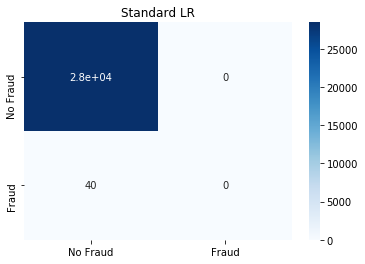

In [51]:
cm=confusion_matrix(y_test.astype(int), yhat.astype(int))
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No Fraud', 'Fraud'],
                   yticklabels=['No Fraud', 'Fraud']).set_title('Standard LR')

LR with imbalanced data is particularly failing at predicting the type 1 fraud (here called only fraud) since type 1 fraud cases are very few compared to the overall cases labeled '0'. 

In [52]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
print("SVM Jaccard index: %.2f" % jaccard_score(y_test, yhat,  pos_label='1'))
print("SVM F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

SVM Jaccard index: 0.00
SVM F1-score: 1.00


In [53]:
print(classification_report(y_test.astype(int), yhat.astype(int)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28490
           1       0.00      0.00      0.00        40

    accuracy                           1.00     28530
   macro avg       0.50      0.50      0.50     28530
weighted avg       1.00      1.00      1.00     28530



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can try out Smote resampling that will oversample the minority set and undersample the majority set.

In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_resampled, y_resampled = sm.fit_sample(selected_features_scaled, labels)

In [64]:
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_resampled, y_resampled, test_size=0.13, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (256769, 16) (256769, 1)
Test set: (28530, 16) (28530, 1)


In [65]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_rs, y_train_rs)

yhat = LR.predict(X_test_rs)
yhat_prob = LR.predict_proba(X_test_rs)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Text(0.5, 1, 'Balanced LR')

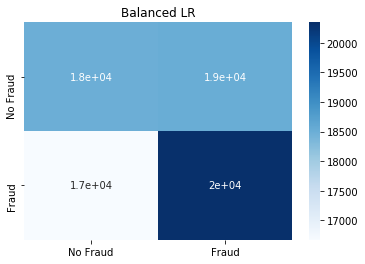

In [66]:
cm=confusion_matrix(y_test_rs.astype(int), yhat.astype(int))
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No Fraud', 'Fraud'],
                   yticklabels=['No Fraud', 'Fraud']).set_title('Balanced LR')

In [67]:
print(classification_report(y_test_rs.astype(int), yhat.astype(int)))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51     37033
           1       0.52      0.55      0.54     37018

    accuracy                           0.52     74051
   macro avg       0.52      0.52      0.52     74051
weighted avg       0.52      0.52      0.52     74051



In [68]:
y_pred=LR.predict(X_test)


print("SVM Jaccard index: %.2f" % jaccard_score(y_test_rs, yhat,  pos_label='1'))
print("SVM F1-score: %.2f" % f1_score(y_test_rs, yhat, average='weighted') )

SVM Jaccard index: 0.37
SVM F1-score: 0.52


Finally, do the same experiment with a random forest regressor.

In [69]:
#imbalanced
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf.fit(X_train, y_train);

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0.5, 1, 'Standard Random Forest')

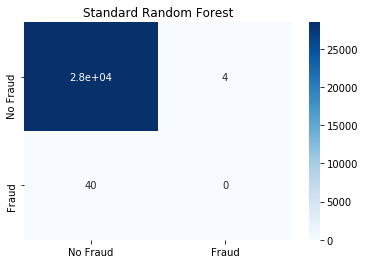

In [70]:
y_pred = rf.predict(X_test)

cm=confusion_matrix(y_test.astype(int), y_pred.astype(int))
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No Fraud', 'Fraud'],
                   yticklabels=['No Fraud', 'Fraud']).set_title('Standard Random Forest')

In [71]:
print(classification_report(y_test_rs.astype(int), yhat.astype(int)))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51     37033
           1       0.52      0.55      0.54     37018

    accuracy                           0.52     74051
   macro avg       0.52      0.52      0.52     74051
weighted avg       0.52      0.52      0.52     74051



In [72]:
y_train_rs

,labels
531494,1
109925,0
432134,1
319586,1
131244,0
...,...
458492,1
107578,0
120705,0
377541,1


In [157]:
#balanced

rf = RandomForestClassifier(n_estimators = 50, random_state = 1)
rf.fit(X_train_rs, np.array(y_train_rs));

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Text(0.5, 1, 'Balanced Random Forest')

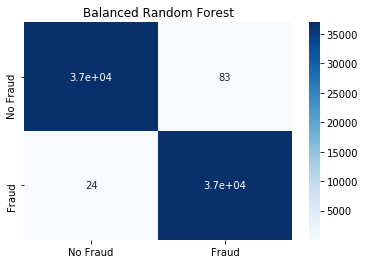

In [158]:
y_pred = rf.predict(X_test_rs)

cm=confusion_matrix(y_test_rs.astype(int), y_pred.astype(int))
sns.heatmap(cm, annot=True,
                    cmap=plt.cm.Blues,
                   xticklabels=['No Fraud', 'Fraud'],
                   yticklabels=['No Fraud', 'Fraud']).set_title('Balanced Random Forest')

In [159]:
print(classification_report(y_test_rs.astype(int), y_pred.astype(int)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37033
           1       1.00      1.00      1.00     37018

    accuracy                           1.00     74051
   macro avg       1.00      1.00      1.00     74051
weighted avg       1.00      1.00      1.00     74051



Training results look good of the Balanced Random Forest look good. 

# Anomaly Detection

We are going to start by clustering the data and the first step is to find the optimal number of clusters (k) for the K-Means method.

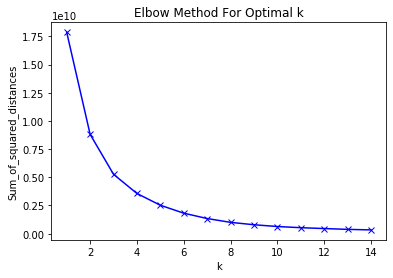

In [138]:
#find out the optimal number of clusters, k 

from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)
    
#the elbow graph
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [136]:
features_scaled

array([[-5.96585652e-01, -1.12640276e+00,  1.42332586e+00, ...,
        -4.91951854e-01, -5.83944084e-01,  3.34097404e-01],
       [ 5.14676383e-01, -2.19845607e-01,  9.12634517e-01, ...,
         5.07270548e-02,  8.31059266e-02, -1.53958012e-01],
       [-3.72301739e-01,  3.26451991e-01,  1.18361165e+00, ...,
        -1.65753735e-01,  1.38060281e-01, -3.22691222e-01],
       ...,
       [-1.14667204e+00, -3.88163659e-01,  1.00076028e+00, ...,
         1.14286544e+00, -7.81546912e-01,  3.04366022e+00],
       [ 7.35343793e-01, -4.48092126e-01, -9.58555334e-01, ...,
        -2.37984830e-02, -1.28607391e-03, -2.53471440e-01],
       [-1.16794398e+00, -3.46453139e-01,  9.18135833e-01, ...,
        -2.64889342e+00,  1.16716938e+00,  3.42290277e-01]])

The elbow method seems to suggest k=2 or k=3

In [139]:
#try mean-shift and k-means
#first, k-means trying out k=2
from sklearn.cluster import KMeans 

clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(features)
km_labels = k_means.labels_
print(km_labels)

[0 0 0 ... 1 0 0]


>1 mean=0.9983 se=0.000
>2 mean=0.9983 se=0.000
>3 mean=0.9983 se=0.000
>4 mean=0.9983 se=0.000
>5 mean=0.9983 se=0.000
>6 mean=0.9983 se=0.000
>7 mean=0.9983 se=0.000
>8 mean=0.9983 se=0.000
>9 mean=0.9983 se=0.000
>10 mean=0.9983 se=0.000
>11 mean=0.9983 se=0.000
>12 mean=0.9983 se=0.000
>13 mean=0.9983 se=0.000
>14 mean=0.9983 se=0.000
>15 mean=0.9983 se=0.000


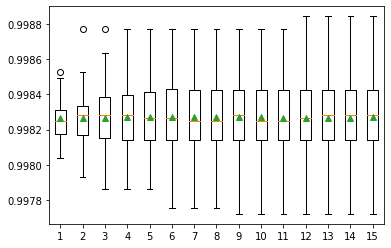

In [140]:
# We can check the accuracy of the clustering via repeated k-fold cross validation.

X = features
y = labels
# compare the number of repeats for repeated k-fold cross-validation
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
	# create model
	model = LogisticRegression()
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

repeats = range(1,16)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X, y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [141]:
df['cl_km_2'] = ''
df['cl_km_2'] = pd.DataFrame(km_labels)
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels,cl_km_2,cl_km_3,anomaly
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0,0,1,1
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0,0,2,1
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0,0,2,1
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0,0,2,1
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0,0,2,1


In [142]:
labels.astype(np.float)

,labels
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
285294,0.0
285295,0.0
285296,0.0
285297,0.0


In [143]:
df['labels'] = km_labels

In [144]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels,cl_km_2,cl_km_3,anomaly
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0,0,1,1
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0,0,2,1
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0,0,2,1
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0,0,2,1
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0,0,2,1


Let's visualize the clusters.

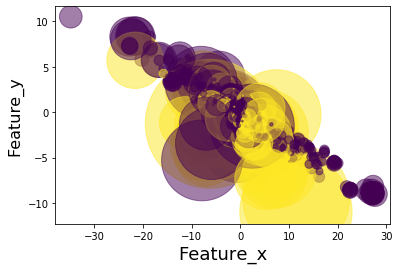

In [145]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 20], df.iloc[:, 21], s=area, c=km_labels.astype(np.float), alpha=0.5)
plt.xlabel('Feature_x', fontsize=18)
plt.ylabel('Feature_y', fontsize=16)

plt.show()

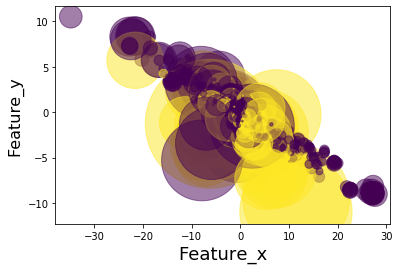

In [146]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 20], df.iloc[:, 21], s=area, c=km_labels.astype(np.float), alpha=0.5)
plt.xlabel('Feature_x', fontsize=18)
plt.ylabel('Feature_y', fontsize=16)

plt.show()

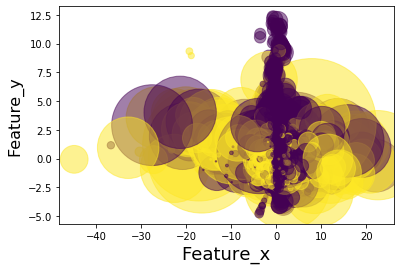

In [147]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 22], df.iloc[:, 10], s=area, c=km_labels.astype(np.float), alpha=0.5)
plt.xlabel('Feature_x', fontsize=18)
plt.ylabel('Feature_y', fontsize=16)

plt.show()

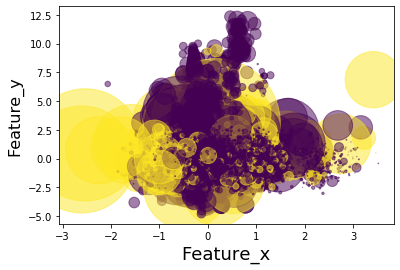

In [148]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 25], df.iloc[:, 10], s=area, c=km_labels.astype(np.float), alpha=0.5)
plt.xlabel('Feature_x', fontsize=18)
plt.ylabel('Feature_y', fontsize=16)

plt.show()

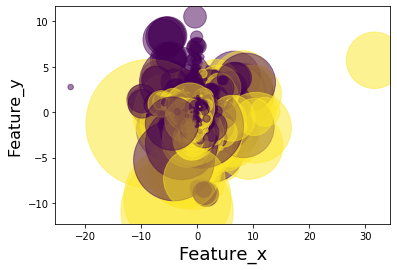

In [149]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 26], df.iloc[:, 21], s=area, c=km_labels.astype(np.float), alpha=0.5)
plt.xlabel('Feature_x', fontsize=18)
plt.ylabel('Feature_y', fontsize=16)

plt.show()

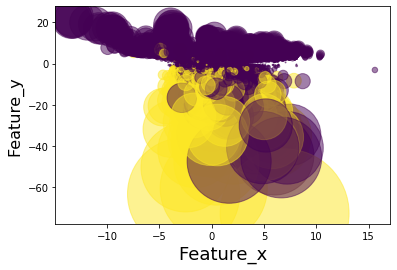

In [150]:
area = np.pi * ( df.iloc[:, 1])**2  
plt.scatter(df.iloc[:, 8], df.iloc[:, 1], s=area, c=km_labels.astype(np.float), alpha=0.5)
plt.xlabel('Feature_x', fontsize=18)
plt.ylabel('Feature_y', fontsize=16)

plt.show()

A 3D visualization can be informative.

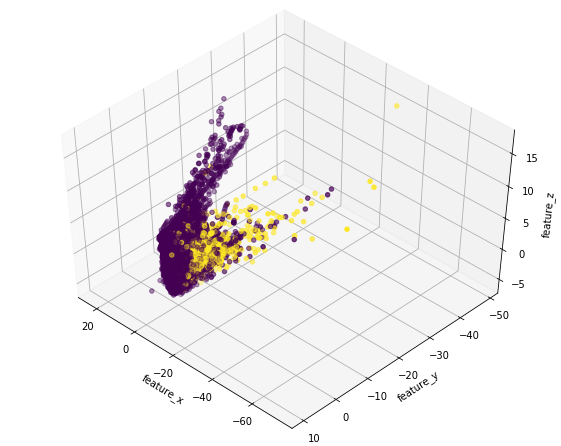

In [151]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
ax.set_zlabel('feature_z')

ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], c= km_labels.astype(np.float))

In [152]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels,cl_km_2,cl_km_3,anomaly
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0,0,1,1
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0,0,2,1
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0,0,2,1
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0,0,2,1
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0,0,2,1


In [108]:
df['cl_km_2'].value_counts()

0    284827
1       472
Name: cl_km_2, dtype: int64

We have managed to detect 472 out of 491 IDs that are labeled as fraud cases without utilizing the labels via a simple clustering method.

Let's now check if there are previously unknown anomalies by clustering with k=3.

In [109]:
#try mean-shift and k-means
#first, k-means trying out k=3

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(features_scaled)
km_labels2 = k_means.labels_
print(km_labels2)

[1 2 2 ... 2 1 2]


In [111]:
df['cl_km_3'] = ''
df['cl_km_3'] = pd.DataFrame(km_labels2)
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels,cl_km_2,cl_km_3
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.200209,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0,0,1
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,-0.029675,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0,0,2
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.248392,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0,0,2
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,0.064255,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0,0,2
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,0.028236,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0,0,2


Time to visualize the results.

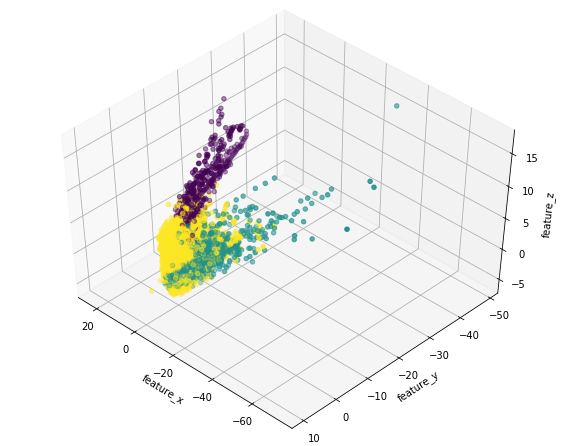

In [113]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
ax.set_zlabel('feature_z')

ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], c= km_labels2.astype(np.float))

There is no significant separation so we will go with k=2. Another suitable anomaly detection method is via training an Isolation Forest. We can see if the results match or not.

In [115]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(features_scaled)
pred = clf.predict(features_scaled)
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    251063
-1     34236
Name: anomaly, dtype: int64


In [116]:
df['labels'] = labels

df['cl_km_2'] = km_labels


In [156]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_24,feature_25,feature_26,feature_27,feature_28,amount_eur,labels,cl_km_2,cl_km_3,anomaly
0,-1.193849,-1.871586,2.224898,-1.090140,-0.536515,-0.041466,-0.475425,0.202289,0.277062,-0.216060,...,0.086313,0.413561,-0.096361,-0.200163,-0.192922,172.02,0,0,1,1
1,1.014600,-0.360200,1.422250,0.498489,-1.110669,0.254908,-0.901195,0.308323,0.415149,-0.020709,...,0.290124,0.054220,0.570855,0.020964,0.027613,49.90,0,0,2,1
2,-0.748122,0.550571,1.848142,-1.287417,0.080075,-0.733385,0.504209,0.029300,-0.087732,-0.963257,...,-0.129816,0.167872,0.856251,-0.067246,0.045781,7.68,0,0,2,1
3,1.297804,0.308941,0.325327,0.494055,-0.151871,-0.685605,0.114777,-0.227636,-0.065031,-0.092557,...,-0.093879,0.316515,0.122392,-0.023309,0.015857,0.89,0,0,2,1
4,1.251340,-0.606993,-1.205160,-0.563053,1.655820,3.436289,-0.709391,0.768215,-1.251615,0.876735,...,0.926517,0.488012,-0.527343,0.031698,0.037443,80.09,0,0,2,1


In [117]:
#Let's check out if anomaly data set actually contains our second cluster. 
anomaly = df[df['anomaly']==-1]
normal = df[df['anomaly']==1]


In [118]:
anomaly['cl_km_2'].value_counts()


0    33764
1      472
Name: cl_km_2, dtype: int64

In [119]:
normal['cl_km_2'].value_counts()

0    251063
Name: cl_km_2, dtype: int64

We observe that the Isolation Forest technique captured the labeled fraud cases and some non-labeled data in the anomaly group. The anomalous behavior in the assumed non-fraud data might warrant future exploration for deeper insight.

In this notebook, we have explored some fraud and anomaly detection techniques. We have completed tasks 1 and 2 by training supervised and unsupervised machine learning models, respectively.